# 多元线性回归实践作业

## 利用梯度下降法求解：当参数取值为多少时下面的代价函数值最小，最小值为多少？

假设**cost function（代价函数）**：$$ J(\theta) = \theta^3-2\theta+1$$

In [1]:
import numpy as np

# 初始化参数为零
maxloop=1000  #最大迭代次数
epsilon=0.00001  #精确度
alpha=0.001    #学习速率
theta =5      #参数初始值
    
count = 0 # 记录迭代次数
converged = False # 是否收敛标志
#cost =  np.inf # 初始化代价为无穷大
costs = [] # 记录每一次迭代的代价值
thetas =[] # 记录每一轮theta的更新 

costs.append(theta**3-2*theta+1) #记录初始代价函数值
thetas.append(theta)           #记录初始参数值

while count<= maxloop:
        if converged:
            break
        # 迭代次数变化
        count = count + 1
        
        # 梯度下降，迭代更新参数值
        theta= theta-alpha*(3*theta**2-2)
          
        # 将每次更新的值存在列表中
        thetas.append(theta)
                
        # 更新当前代价函数值，并将每次的结果存在列表中
        cost = theta**3-2*theta+1
        costs.append(cost)
        
        # 如果收敛，则不再迭代
        if abs(cost)<epsilon:
            converged = True 

In [2]:
theta #参数最优值

0.8250960418005244

In [3]:
cost #代价函数最小值

-0.08848033041924919

梯度下降过程中，代价函数值的变化图

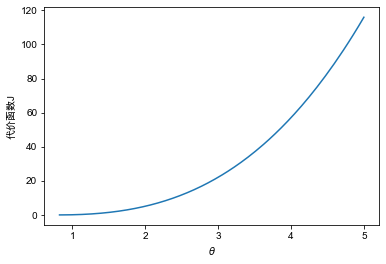

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.plot(thetas, costs) 
plt.xlabel(r'$\theta$')
plt.ylabel(r'代价函数J')
plt.show()

梯度下降过程中，𝜃随迭代次数的变化图

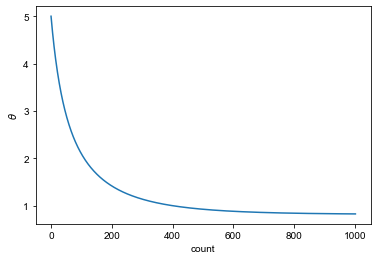

In [5]:
plt.plot(range(len(thetas)),thetas) 
plt.xlabel(r'count')
plt.ylabel(r'$\theta$')
plt.show()

梯度下降过程中,代价函数J随迭代次数的变化图

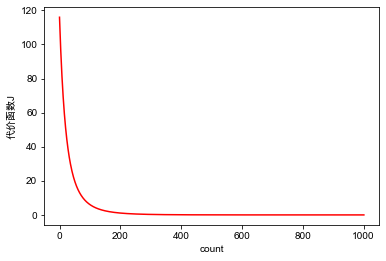

In [6]:
plt.plot(range(len(costs)),costs,color="red") 
plt.xlabel(r'count')
plt.ylabel(r'代价函数J')
plt.show()

## 完成电影票房数据的线性回归分析，并比较不同线性回归模型求解结果，对模型进行评价

** 具体要求如下**

（1）完整的数据分析流程

（2）模型需包含随机梯度下降、最小二乘法、岭回归、Lasso回归四种方法

（3）代码在此文档中完成

（4）另外三人合作完成一份基于此数据的分析报告（背景、数据介绍、描述分析、模型思想、模型构建及评价、结论及建议，格式：宋体、小四、1.5倍行距）

### 导入数据

In [10]:
import os
os.chdir("G:/CDO/机器学习/2.线性回归/") #修改当前工作目录

import pandas as pd
data=pd.read_csv("film.csv",encoding='gbk') #导入房价数据
data.head() #查看数据前5行

,片名,放映场数,人数,boxoffice,genre,year,month,week,distribute,runtime,...,sequel,导演,导演年代,第几部作品,导演得奖情况,导演是否转型,主演1,baidu index1,主演2,baidu index2
0,新天生一对,72.57,165.52,5274.60,家庭伦理,2012,1,5,C,100,...,0,朱延平,50.0,62.0,1.0,0.0,周渝民,3719,陈嘉桦,903.0
1,大笑江湖,154.37,486.62,15392.82,喜剧,2010,12,49,S,119,...,0,朱延平,50.0,60.0,1.0,0.0,小沈阳,10215,赵本山,16746.0
2,我爱灰太狼,112.53,227.24,7130.16,动画,2012,8,33,C,87,...,0,朱枫,60.0,5.0,0.0,0.0,赵娜,335,张琳,891.0
3,西游降魔篇,730.23,3107.04,124643.87,魔幻,2013,2,6,S,110,...,0,周星驰,60.0,9.0,1.0,1.0,文章,30326,舒淇,10322.0
4,大追捕,99.48,153.19,4814.32,警匪,2012,3,12,C,107,...,0,周显扬,70.0,2.0,0.0,0.0,张家辉,4147,任达华,3955.0


### 查看数据概况，是否有缺失值等

In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   片名            275 non-null    object 
 1   放映场数          275 non-null    float64
 2   人数            275 non-null    float64
 3   boxoffice     275 non-null    float64
 4   genre         275 non-null    object 
 5   year          275 non-null    int64  
 6   month         275 non-null    int64  
 7   week          275 non-null    int64  
 8   distribute    275 non-null    object 
 9   runtime       275 non-null    int64  
 10  story         275 non-null    object 
 11  reality       275 non-null    int64  
 12  remake        275 non-null    int64  
 13  sequel        275 non-null    int64  
 14  导演            275 non-null    object 
 15  导演年代          274 non-null    float64
 16  第几部作品         274 non-null    float64
 17  导演得奖情况        274 non-null    float64
 18  导演是否转型        274 non-null    

In [12]:
data.describe()  

,放映场数,人数,boxoffice,year,month,week,runtime,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,baidu index2
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,274.000000,274.000000,274.000000,274.000000,275.000000,267.000000
mean,122.788873,329.155345,11162.148545,2011.618182,6.541818,27.298182,104.443636,0.090909,0.101818,0.167273,61.021898,13.255474,0.569343,0.135036,9304.883636,7656.973783
std,122.212975,472.989359,17112.347930,1.112158,3.340893,14.595713,13.946964,0.288004,0.302960,0.373900,9.161527,18.296311,0.496074,0.342388,12718.507023,11922.172713
min,4.270000,28.540000,1010.160000,2010.000000,1.000000,1.000000,75.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,45.420000,72.355000,2193.975000,2011.000000,4.000000,14.000000,94.500000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,0.000000,2025.000000,1595.500000
50%,75.380000,156.030000,4817.180000,2012.000000,7.000000,28.000000,102.000000,0.000000,0.000000,0.000000,60.000000,7.000000,1.000000,0.000000,5534.000000,3736.000000
75%,155.930000,418.225000,13871.445000,2013.000000,9.000000,39.000000,112.500000,0.000000,0.000000,0.000000,70.000000,16.000000,1.000000,0.000000,9630.000000,8430.500000
max,833.710000,3920.550000,127168.130000,2013.000000,12.000000,53.000000,156.000000,1.000000,1.000000,1.000000,80.000000,110.000000,1.000000,1.000000,84936.000000,84936.000000


In [34]:
data = data.drop(columns=['片名','人数','放映场数','导演','主演1','主演2'])
data.head()

,boxoffice,genre,year,month,week,distribute,runtime,story,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,baidu index2
0,5274.60,家庭伦理,2012,1,5,C,100,S,0,1,0,50.0,62.0,1.0,0.0,3719,903.0
1,15392.82,喜剧,2010,12,49,S,119,S,0,0,0,50.0,60.0,1.0,0.0,10215,16746.0
2,7130.16,动画,2012,8,33,C,87,S,0,0,0,60.0,5.0,0.0,0.0,335,891.0
3,124643.87,魔幻,2013,2,6,S,110,N,0,0,0,60.0,9.0,1.0,1.0,30326,10322.0
4,4814.32,警匪,2012,3,12,C,107,S,0,0,0,70.0,2.0,0.0,0.0,4147,3955.0


In [36]:
data.dropna(axis=0, how='any', inplace=True)
data.shape

(266, 17)

### 描述分析

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#jupyter notebook中为了在代码行直接显示图形
%matplotlib inline 

warnings.filterwarnings('ignore')
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

#### 单变量分析

In [38]:
plt.style.use('ggplot') #设置图形显示风格

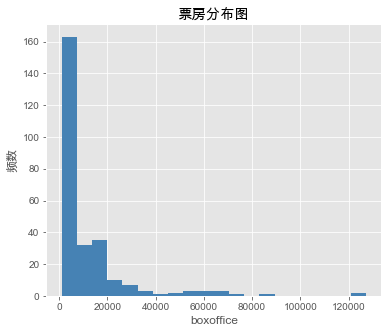

In [39]:
figure = plt.figure(1, figsize=(6, 5))
plt.hist(data.boxoffice,bins=20,color='steelblue')
plt.title('票房分布图')  # 设置标题
plt.ylabel('频数')  # 设置纵坐标
plt.xlabel('boxoffice')  # 设置横坐标
plt.show()

改善右偏情况，避免异方差，用对数处理画图

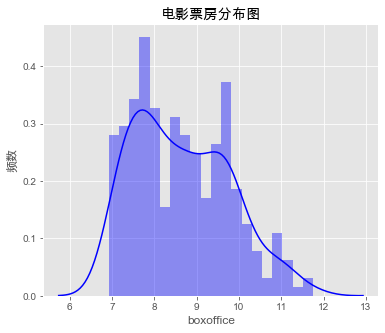

In [40]:
figure = plt.figure(1, figsize=(6, 5))
sns.distplot(np.log(data['boxoffice']),bins=20,color='blue',kde=True)
plt.title('电影票房分布图')  # 设置标题
plt.ylabel('频数')  # 设置纵坐标
plt.xlabel('boxoffice')  # 设置横坐标
plt.show()

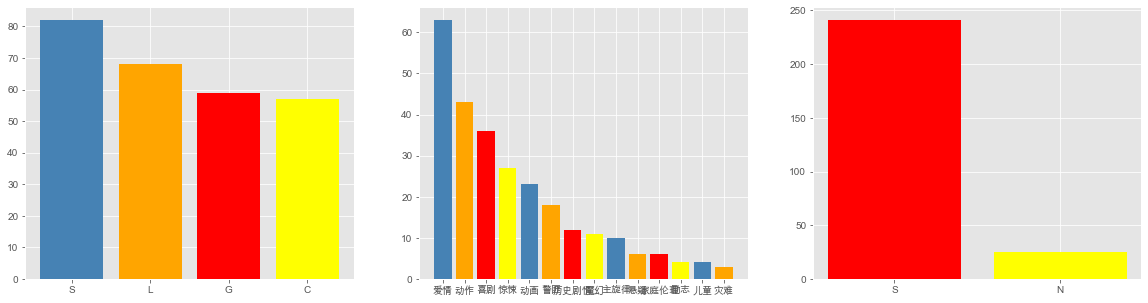

In [41]:
##分类特征的数量统计柱形图
fig = plt.figure(3, figsize=(20, 5))
ax1 = plt.subplot(131) 
ax1.bar(data['distribute'].value_counts().index,data['distribute'].value_counts().values,color = ['steelblue','orange','red','yellow'])

ax2 = plt.subplot(132) 
ax2.bar(data['genre'].value_counts().index,data['genre'].value_counts().values,color = ['steelblue','orange','red','yellow'])

ax3 = plt.subplot(133) 
ax3.bar(data['story'].value_counts().index,data['story'].value_counts().values,color = ['red','yellow'])
plt.show()

#### 双变量分析

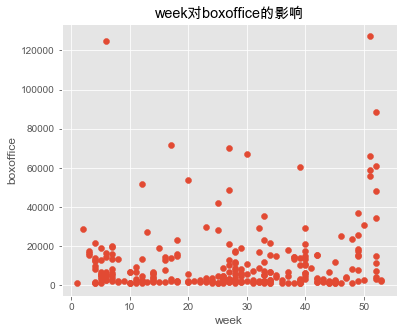

In [45]:
vfig = plt.figure(3, figsize=(6, 5))
plt.scatter(data['week'],data['boxoffice'])
plt.title('week对boxoffice的影响')  # 设置标题
plt.ylabel('boxoffice')  # 设置纵坐标
plt.xlabel('week')  # 设置横坐标
plt.show()

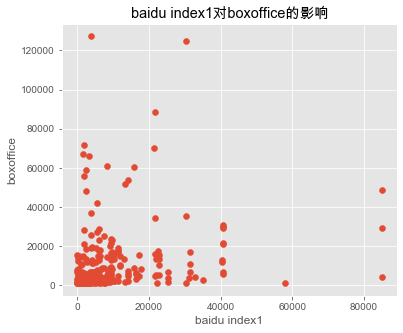

In [46]:
vfig = plt.figure(3, figsize=(6, 5))
plt.scatter(data['baidu index1'],data['boxoffice'])
plt.title('baidu index1对boxoffice的影响')  # 设置标题
plt.ylabel('boxoffice')  # 设置纵坐标
plt.xlabel('baidu index1')  # 设置横坐标
plt.show()

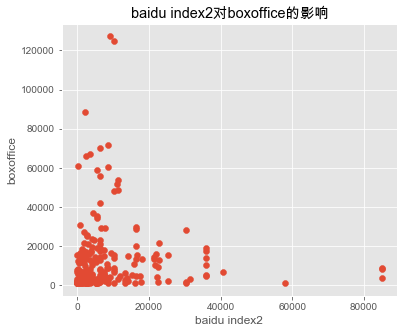

In [47]:
vfig = plt.figure(3, figsize=(6, 5))
plt.scatter(data['baidu index2'],data['boxoffice'])
plt.title('baidu index2对boxoffice的影响')  # 设置标题
plt.ylabel('boxoffice')  # 设置纵坐标
plt.xlabel('baidu index2')  # 设置横坐标
plt.show()

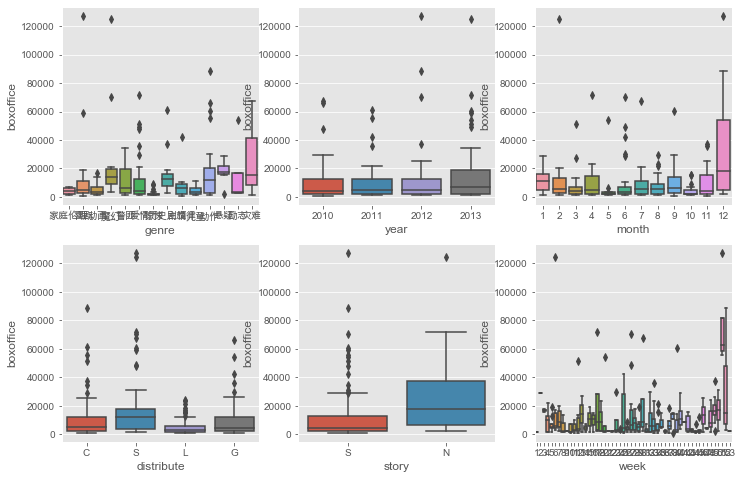

In [48]:
## seaborn绘制箱线图
plt.figure(6, figsize=(12, 8)) #设置画布
### genre与票房的箱图
plt.subplot(231)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='genre',y='boxoffice',data=data)

### year与票房的箱图
plt.subplot(232)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='year',y='boxoffice',data=data)

### month与票房的箱图
plt.subplot(233)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='month',y='boxoffice',data=data)

### distribute与票房的箱图
plt.subplot(234)  # 1*3分布的画图中的第一个子图 
sns.boxplot(x='distribute',y='boxoffice',data=data)

### story与票房的箱图
plt.subplot(235)  # 1*3分布的画图中的第一个子图
sns.boxplot(x='story',y='boxoffice',data=data)

### week与票房的箱图
plt.subplot(236) 
sns.boxplot(x='week',y='boxoffice',data=data)

plt.show()

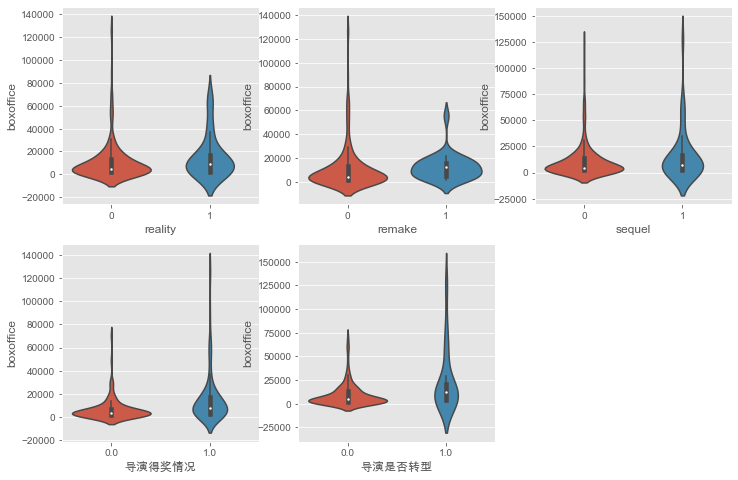

In [49]:
## seaborn绘制箱线图
plt.figure(6, figsize=(12, 8)) #设置画布
### reality与票房的箱图
plt.subplot(231)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='reality',y='boxoffice',data=data)

### remake与票房的箱图
plt.subplot(232)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='remake',y='boxoffice',data=data)

### sequel与票房的箱图
plt.subplot(233)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='sequel',y='boxoffice',data=data)

### 导演得奖情况与票房的箱图
plt.subplot(234)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='导演得奖情况',y='boxoffice',data=data)

### 导演是否转型与票房的箱图
plt.subplot(235)  # 1*3分布的画图中的第一个子图
sns.violinplot(x='导演是否转型',y='boxoffice',data=data)

plt.show()

### 处理分类数据

In [52]:
data1=pd.get_dummies(data[["genre","year","month","distribute","story","reality","remake","sequel","导演年代","第几部作品","导演得奖情况","导演是否转型","baidu index1","baidu index2"]]) #one-hot编码
data1.head()

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_灾难,genre_爱情,genre_警匪,genre_魔幻,distribute_C,distribute_G,distribute_L,distribute_S,story_N,story_S
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,0,1,0,0,0,0,1
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,0,1,0,1
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,0,1,0,0,0,0,1
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,0,1,0,0,0,1,1,0
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,0,1,0,1,0,0,0,0,1


In [53]:
data2=pd.get_dummies(data[["genre","year","month","distribute","story","reality","remake","sequel","导演年代","第几部作品","导演得奖情况","导演是否转型","baidu index1","baidu index2"]],drop_first=True)#虚编码
data2.head()

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_悬疑,genre_惊悚,genre_灾难,genre_爱情,genre_警匪,genre_魔幻,distribute_G,distribute_L,distribute_S,story_S
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,0,0,0,0,0,0,1
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,0,0,1,1
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,0,0,0,0,0,0,1
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,0,0,0,1,0,0,1,0
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,0,0,0,1,0,0,0,0,1


In [54]:
data3=data[["boxoffice"]]
data3.head()

,boxoffice
0,5274.60
1,15392.82
2,7130.16
3,124643.87
4,4814.32


In [55]:
data1_new=pd.concat([data1,data3],axis=1) #one-hot编码后的完整数据
data1_new.head()

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_爱情,genre_警匪,genre_魔幻,distribute_C,distribute_G,distribute_L,distribute_S,story_N,story_S,boxoffice
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,1,0,0,0,0,1,5274.60
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,1,0,1,15392.82
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,1,0,0,0,0,1,7130.16
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,1,0,0,0,1,1,0,124643.87
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,1,0,1,0,0,0,0,1,4814.32


In [56]:
data1_new.shape

(266, 32)

In [57]:
data1_new.fillna(0)

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_爱情,genre_警匪,genre_魔幻,distribute_C,distribute_G,distribute_L,distribute_S,story_N,story_S,boxoffice
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,1,0,0,0,0,1,5274.60
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,1,0,1,15392.82
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,1,0,0,0,0,1,7130.16
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,1,0,0,0,1,1,0,124643.87
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,1,0,1,0,0,0,0,1,4814.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2013,7,0,0,1,60.0,6.0,0.0,0.0,272,...,0,0,0,1,0,0,0,0,1,8259.17
271,2012,7,0,0,0,60.0,5.0,1.0,0.0,2594,...,0,0,0,0,1,0,0,0,1,5827.06
272,2010,10,0,0,0,60.0,11.0,1.0,0.0,3695,...,0,0,1,0,0,1,0,1,0,3774.74
273,2013,12,0,0,0,60.0,3.0,0.0,0.0,40822,...,0,1,0,0,0,0,1,0,1,30913.51


In [58]:
data2_new=pd.concat([data2,data3],axis=1) #哑编码后的完整数据
data2_new.head()

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_惊悚,genre_灾难,genre_爱情,genre_警匪,genre_魔幻,distribute_G,distribute_L,distribute_S,story_S,boxoffice
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,0,0,0,0,0,1,5274.60
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,0,1,1,15392.82
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,0,0,0,0,0,1,7130.16
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,0,0,1,0,0,1,0,124643.87
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,0,0,1,0,0,0,0,1,4814.32


In [59]:
data2_new.shape

(266, 29)

In [60]:
data2_new.fillna(0)

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_惊悚,genre_灾难,genre_爱情,genre_警匪,genre_魔幻,distribute_G,distribute_L,distribute_S,story_S,boxoffice
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,0,0,0,0,0,1,5274.60
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,0,1,1,15392.82
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,0,0,0,0,0,1,7130.16
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,0,0,1,0,0,1,0,124643.87
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,0,0,1,0,0,0,0,1,4814.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2013,7,0,0,1,60.0,6.0,0.0,0.0,272,...,1,0,0,0,0,0,0,0,1,8259.17
271,2012,7,0,0,0,60.0,5.0,1.0,0.0,2594,...,1,0,0,0,0,1,0,0,1,5827.06
272,2010,10,0,0,0,60.0,11.0,1.0,0.0,3695,...,0,0,0,0,1,0,1,0,0,3774.74
273,2013,12,0,0,0,60.0,3.0,0.0,0.0,40822,...,0,0,0,1,0,0,0,1,1,30913.51


### 拆分数据集

#### 先拆分成特征和标签

In [62]:
X=data2_new.iloc[:,:28] #特征
X.head()

,year,month,reality,remake,sequel,导演年代,第几部作品,导演得奖情况,导演是否转型,baidu index1,...,genre_悬疑,genre_惊悚,genre_灾难,genre_爱情,genre_警匪,genre_魔幻,distribute_G,distribute_L,distribute_S,story_S
0,2012,1,0,1,0,50.0,62.0,1.0,0.0,3719,...,0,0,0,0,0,0,0,0,0,1
1,2010,12,0,0,0,50.0,60.0,1.0,0.0,10215,...,0,0,0,0,0,0,0,0,1,1
2,2012,8,0,0,0,60.0,5.0,0.0,0.0,335,...,0,0,0,0,0,0,0,0,0,1
3,2013,2,0,0,0,60.0,9.0,1.0,1.0,30326,...,0,0,0,0,0,1,0,0,1,0
4,2012,3,0,0,0,70.0,2.0,0.0,0.0,4147,...,0,0,0,0,1,0,0,0,0,1


In [65]:
y=data2_new.iloc[:,28].values #标签
y

array([  5274.6 ,  15392.82,   7130.16, 124643.87,   4814.32,  12001.3 ,
         2962.67,   3034.19,   1678.76,   8941.84,   1442.6 ,   2876.68,
         2364.94,  71901.52,  10345.47,  14218.55,  12750.3 ,   1292.96,
         1820.7 ,  60948.  ,  14661.79,   3002.54,  19635.4 ,   1886.95,
         4424.28,   1655.78,  10275.  ,   3164.37,   1774.2 ,   2467.85,
         2042.25,   5127.52,   6973.18,   3370.52,   6171.58,   2410.93,
        14028.67,   2120.85,  23403.87,   1439.02,   4338.88,   1324.46,
         3739.37,   1492.94,   7490.13,   2470.62,   2361.12,  51549.6 ,
         1437.12,   6315.64,   7073.56,   1125.5 , 127168.13,  60273.21,
        55623.  ,  29227.94,  12987.  ,  11265.  ,   4751.27,   6674.24,
        13289.84,  70316.28,   2262.06,   1346.15,  28428.  ,   7673.24,
         3139.78,   2175.62,   3536.2 ,  14299.1 ,   5430.38,  10314.26,
        15012.96,   6934.96,   2539.37,   2249.42,   6073.06,   3834.85,
        28825.54,   6756.36,   1309.89,   2537.56, 

In [66]:
from sklearn import model_selection 
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.1,random_state=42)

In [67]:
X_train.shape 

(239, 28)

In [68]:
y_train.shape

(239,)

### 数据标准化

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [70]:
X_train[1:3,]

array([[ 0.35763348, -1.64825239, -0.31037119, -0.31840617, -0.42798168,
        -1.21010103,  0.13383951,  0.83368787,  2.41424345, -0.27353834,
        -0.50655797, -0.1127469 , -0.44158804, -0.31840617, -0.13046561,
        -0.20896919,  2.54337374, -0.16047141, -0.13046561, -0.31037119,
        -0.09186304, -0.56607596, -0.27672473, -0.21964884, -0.54672941,
        -0.56607596,  1.5079697 ,  0.33410763],
       [-1.44182759, -0.15721408, -0.31037119, -0.31840617, -0.42798168,
        -0.09773893, -0.58066111,  0.83368787, -0.41420843, -0.48378164,
        -0.62392226, -0.1127469 , -0.44158804, -0.31840617, -0.13046561,
        -0.20896919, -0.39317855, -0.16047141, -0.13046561,  3.22194854,
        -0.09186304, -0.56607596, -0.27672473, -0.21964884, -0.54672941,
         1.76654738, -0.6631433 ,  0.33410763]])

In [71]:
sc_y=StandardScaler()
y_train=sc_y.fit_transform(y_train.reshape(-1,1))
y_test=sc_y.transform(y_test.reshape(-1,1))

### 构建多元线性回归模型

#### 随机梯度下降法求解线性回归

In [72]:
from sklearn import linear_model
sgd=linear_model.SGDRegressor(max_iter=10000, tol=0.0000001).fit(X_train,y_train)
sgd.score(X_train,y_train)

0.37309931882070735

In [73]:
X_train

array([[-1.44182759,  0.43920124, -0.31037119, ..., -0.56607596,
        -0.6631433 ,  0.33410763],
       [ 0.35763348, -1.64825239, -0.31037119, ..., -0.56607596,
         1.5079697 ,  0.33410763],
       [-1.44182759, -0.15721408, -0.31037119, ...,  1.76654738,
        -0.6631433 ,  0.33410763],
       ...,
       [-0.54209706, -0.15721408, -0.31037119, ..., -0.56607596,
         1.5079697 ,  0.33410763],
       [ 0.35763348, -1.05183707, -0.31037119, ...,  1.76654738,
        -0.6631433 ,  0.33410763],
       [ 1.25736401, -0.75362941, -0.31037119, ..., -0.56607596,
         1.5079697 ,  0.33410763]])

In [74]:
sgd.intercept_

array([0.0013601])

In [75]:
sgd.coef_

array([ 0.18533687,  0.07525618,  0.07112664, -0.002251  ,  0.10210599,
        0.036563  , -0.01407824,  0.16139208,  0.29791229,  0.15007468,
       -0.03397378, -0.01358645,  0.08925398, -0.04972577,  0.03535217,
        0.01546196,  0.00048623, -0.03382906,  0.01946394, -0.0452072 ,
        0.00916034, -0.08989482,  0.01502239,  0.12586781, -0.06220258,
       -0.14582063,  0.05283492, -0.15567985])

In [76]:
sgd.score(X_test,y_test)

0.10854979973006428

In [77]:
pre_y_sgd=sgd.predict(X_test)
pre_y_sgd 

array([ 0.05095907, -0.61251057,  0.10890061,  0.58079752,  0.46215055,
        0.02262839, -0.99446349, -0.48279665,  0.4648485 , -1.10624536,
        0.0189732 ,  0.10095223, -0.2827241 , -0.11299286, -0.23716   ,
       -0.6440586 , -0.86653119,  0.07131673, -0.1515721 ,  0.5718733 ,
        0.64156821,  0.61036423,  0.01293283, -0.55091396, -0.23340435,
       -0.10430262, -0.28616885])

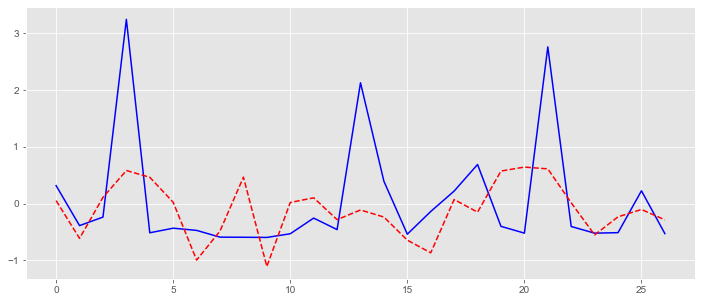

In [78]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_sgd)),pre_y_sgd,"r--",label="预测值")
plt.show() 

#### 最小二乘法

In [90]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train, y_train)

reg.score(X_train,y_train) #训练集上的R方 

0.37322674845857695

In [89]:
reg.intercept_ #截距项 

array([8.28237162e-15])

In [91]:
reg.coef_ #特征权重 

array([[ 0.18348347,  0.07640583,  0.07474413, -0.00083838,  0.10057524,
         0.03775486, -0.01215046,  0.16160639,  0.29325737,  0.14823234,
        -0.03440482, -0.01104687,  0.0982005 , -0.04195235,  0.04054442,
         0.01836168,  0.0084153 , -0.03122493,  0.02422955, -0.03562073,
         0.01202679, -0.08005236,  0.02319302,  0.1318437 , -0.06471829,
        -0.14801428,  0.04549674, -0.15412867]])

In [92]:
reg.score(X_test,y_test) #测试集上的R方

0.11151561147487121

In [93]:
pre_y=reg.predict(X_test)
pre_y 

array([[ 0.0582652 ],
       [-0.61317965],
       [ 0.11979258],
       [ 0.59002668],
       [ 0.45178314],
       [ 0.01070173],
       [-0.99409602],
       [-0.46534274],
       [ 0.47774875],
       [-1.09436643],
       [ 0.02008515],
       [ 0.09648103],
       [-0.28908424],
       [-0.1227056 ],
       [-0.2232874 ],
       [-0.64410858],
       [-0.85698107],
       [ 0.06242223],
       [-0.1355009 ],
       [ 0.5500453 ],
       [ 0.62535811],
       [ 0.59647346],
       [ 0.02629813],
       [-0.54276065],
       [-0.22890755],
       [-0.09246873],
       [-0.27766195]])

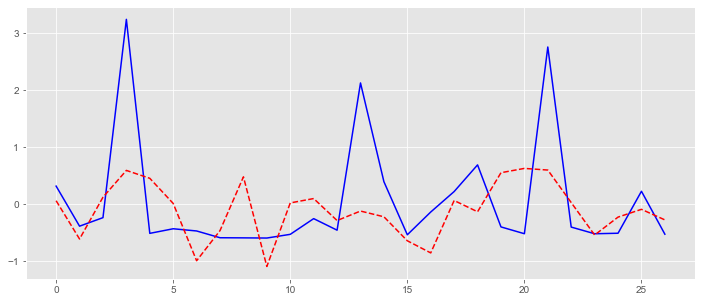

In [94]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y)),pre_y,"r--",label="预测值")
plt.show()

独热编码后普通线性回归

In [95]:
X1=data1_new.iloc[:,:29] #特征
y1=data1_new.iloc[:,29].values #标签
X1_train,X1_test,y1_train,y1_test=model_selection.train_test_split(X1,y1,test_size=0.1,random_state=42)
sc_X=StandardScaler()
X1_train=sc_X.fit_transform(X1_train)#拟合,对X_train进行缩放
X1_test=sc_X.transform(X1_test)#sc_X已经被拟合好了，所以对X_test进行缩放时，直接转换X_test
sc_y=StandardScaler()
y1_train=sc_y.fit_transform(y1_train.reshape(-1,1))
y1_test=sc_y.transform(y1_test.reshape(-1,1))
from sklearn import linear_model
reg1 = linear_model.LinearRegression().fit(X1_train, y1_train)
reg1.score(X1_train,y1_train)

0.31027454495324835

In [96]:
reg1.intercept_ #截距项

array([0.00052749])

In [97]:
reg1.coef_ #特征权重

array([[ 5.35034323e-02,  1.51793347e-01,  8.29904467e-02,
        -1.69522684e-02, -4.70099192e-02,  1.77380723e-02,
        -1.75626944e-01,  2.81719088e-01,  1.71385507e-02,
         1.92197947e-01,  1.50845278e-03, -4.53247580e+11,
        -2.52019637e+11, -8.36498284e+11, -6.54423612e+11,
        -2.90390015e+11, -4.53247580e+11, -7.70864267e+11,
        -3.54137028e+11, -2.90390015e+11, -6.40848906e+11,
        -2.06208671e+11, -9.70445247e+11, -5.81860266e+11,
        -4.74331011e+11, -5.55311715e+12, -5.62642696e+12,
        -5.73054217e+12, -6.15684050e+12]])

In [98]:
pre1_y=reg1.predict(X1_test)
pre1_y 

array([[-0.02481754],
       [ 1.00252621],
       [-0.04971988],
       [ 0.30976122],
       [ 0.18476122],
       [-0.53018863],
       [-0.21964175],
       [-0.36856754],
       [-0.49210269],
       [-0.69815738],
       [ 0.66658871],
       [-0.95977003],
       [ 0.15741747],
       [ 0.3390581 ],
       [ 0.32528012],
       [-0.66446597],
       [ 0.16317075],
       [-0.10234815],
       [ 0.62606137],
       [ 1.2374956 ],
       [-0.18828565],
       [ 0.05585497],
       [-0.46817691],
       [-0.60929019],
       [-0.09220035],
       [ 1.92000668],
       [-0.12930972]])

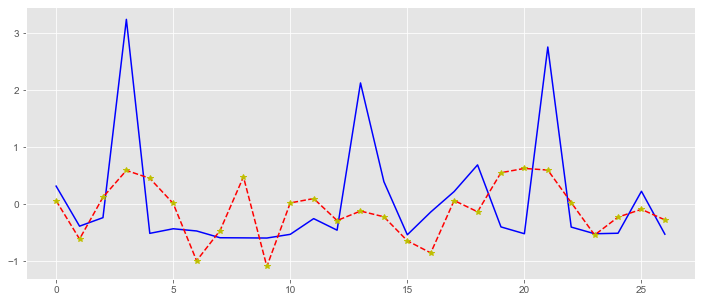

In [99]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y)),pre_y,"r--",label="哑编码后预测值")
plt.plot(range(len(pre1_y)),pre_y,"y*",label="独热编码后预测值")
plt.show()

#### 岭回归(ridge)

In [100]:
rid=linear_model.Ridge().fit(X_train, y_train)

rid.score(X_train, y_train) ##训练集上的R方

0.3732213368028836

In [101]:
rid.intercept_ #截距项

array([8.23928766e-15])

In [102]:
rid.coef_ #特征权重

array([[ 0.18252956,  0.07611827,  0.07357823, -0.00070823,  0.10045007,
         0.03726593, -0.01221446,  0.16062702,  0.29191973,  0.14777991,
        -0.03421705, -0.01154297,  0.09658244, -0.04316446,  0.03988146,
         0.01801698,  0.00689384, -0.03177201,  0.02350138, -0.03706789,
         0.01150414, -0.08127087,  0.02204447,  0.13061607, -0.0640068 ,
        -0.14701647,  0.04624497, -0.15398144]])

In [103]:
rid.score(X_test,y_test)

0.11212164180655693

In [104]:
pre_y_rid=rid.predict(X_test)
pre_y_rid 

array([[ 0.05686583],
       [-0.60859554],
       [ 0.1196631 ],
       [ 0.58603547],
       [ 0.45078368],
       [ 0.01133094],
       [-0.98944205],
       [-0.46646059],
       [ 0.47299433],
       [-1.09148018],
       [ 0.01932528],
       [ 0.09570054],
       [-0.28689651],
       [-0.11989685],
       [-0.22382088],
       [-0.64150471],
       [-0.85525547],
       [ 0.06175206],
       [-0.13659963],
       [ 0.54995862],
       [ 0.62169933],
       [ 0.59499231],
       [ 0.02499514],
       [-0.54186217],
       [-0.22748605],
       [-0.09218039],
       [-0.27902093]])

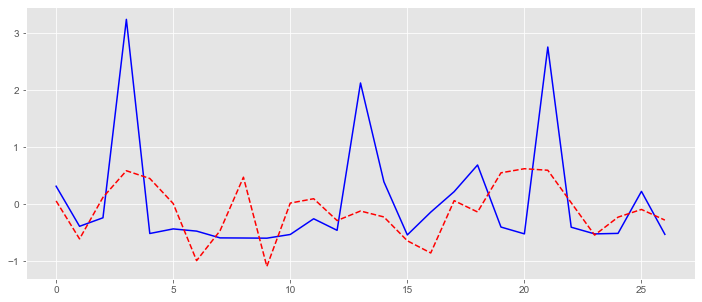

In [105]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_rid)),pre_y_rid,"r--",label="预测值")
plt.show()

#### Lasso回归

In [106]:
las=linear_model.Lasso().fit(X_train, y_train)
las.score(X_train, y_train)

0.0

In [107]:
las.intercept_

array([-6.68920986e-17])

In [108]:
las.coef_ #特征权重

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0., -0.])

In [109]:
las.score(X_test,y_test)

-0.002350208810076415

In [160]:
pre_y_las=las.predict(X_test)
pre_y_las

array([-6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17, -6.68920986e-17,
       -6.68920986e-17, -6.68920986e-17, -6.68920986e-17])

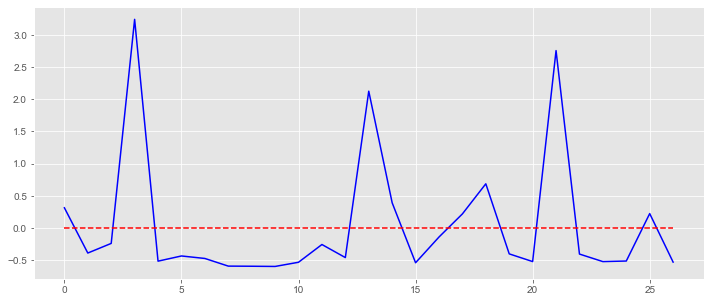

In [161]:
fig=plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)),y_test,"b",label="真实值")
plt.plot(range(len(pre_y_las)),pre_y_las,"r--",label="预测值")
plt.show()